In [2]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# auf 0,0 normalisieren jeden trial
def normalize_positions(row): 
    x_positions = row["xpos"]
    y_positions = row["ypos"]
    
    x_start, y_start = x_positions[0], y_positions[0]

    row["xpos"] = [x - x_start for x in x_positions]
    row["ypos"] = [y - y_start for y in y_positions]
    
    return row

# Interpolation auf 100 Zeiteinheiten
def interpolate_positions(row):
    original_length = len(row["xpos"])
    original_time = np.linspace(0, 1, original_length)  # Ursprünglicher Zeitvektor
    new_time = np.linspace(0, 1, 100)  # Ziel-Zeitvektor mit 100 Zeiteinheiten
    
    # Interpolation der x- und y-Positionen
    row["xpos"] = np.interp(new_time, original_time, row["xpos"])
    row["ypos"] = np.interp(new_time, original_time, row["ypos"])
    return row

def can_convert_to_int(lst):
    """Checks if every value in a list can be converted to an integer."""
    if not isinstance(lst, list):  
        return False  # Ensure input is a list
    
    try:
        return all(isinstance(int(x), int) for x in lst)  # Try converting each element
    except (ValueError, TypeError):  
        return False  # If any element fails, return False

In [12]:
df1 = pd.read_csv("data/6/trial_data_6.txt", sep=",");
df2 = pd.read_csv("data/6/trial_data_6_2.txt", sep=",");

df2["blocknumber"] = 4

merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df.to_csv('data/trial_data_6', sep=",", index=False)

In [3]:
directory = "data"
mouse_data_regex = r"mouse_data_(\d+)"
grouped_data = []

for filename in os.listdir(directory):
    mouse_data_match = re.search(mouse_data_regex, filename)

    if mouse_data_match:
        participant_num = int(mouse_data_match.group(1))
        file_path = os.path.join(directory, filename)

        df_mouse_data =  pd.read_csv(file_path, sep=",")
        grouped_mouse_data = df_mouse_data.groupby(["blocknumber", "trialnumber"]).agg({
            "timedifference": list,  
            "xpos": list,            
            "ypos": list             
        }).reset_index()

        print(participant_num)
        
        grouped_mouse_data = grouped_mouse_data.apply(normalize_positions, axis=1)

        grouped_mouse_data = grouped_mouse_data.apply(interpolate_positions, axis=1)

        grouped_mouse_data["participant_num"] = participant_num

        grouped_data.append(grouped_mouse_data)
        #print(grouped_mouse_data["participant_num"])
        
        #print(len(grouped_mouse_data["xpos"]))
        #print(df_mouse_data.groupby("blocknumber")["trialnumber"].nunique())

        #print(df_mouse_data["blocknumber"].nunique(), df_mouse_data["trialnumber"].nunique())
        #print(df_mouse_data.groupby(["blocknumber", "trialnumber"]).size().unstack())



1
10
11
12
13
2
3
4
5
7
8
9


## Für manche Trials wurden keine Messwerte aufgezeichnet aus irgendeinem grund... also sind die unterschiedlich lang die grouped_mouse_data
### Wir müssen die die nicht aufgezeichnet wurden als "fail" btrachten eigentlich und rauslöschen.. (macht aber eigentlich nix) -> Sonderfall für 6 noch beachten!!!

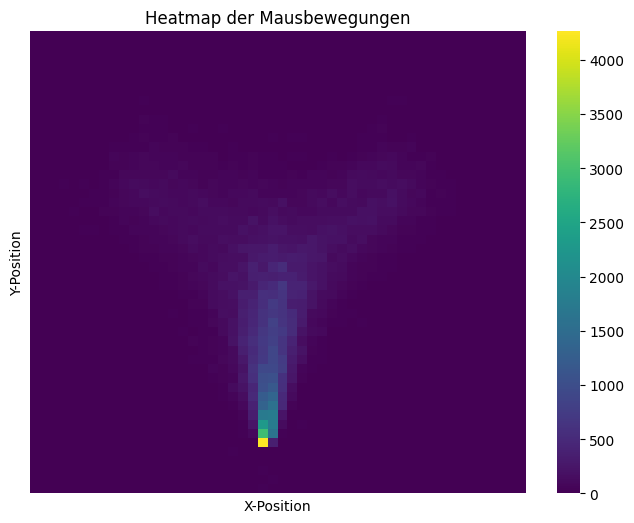

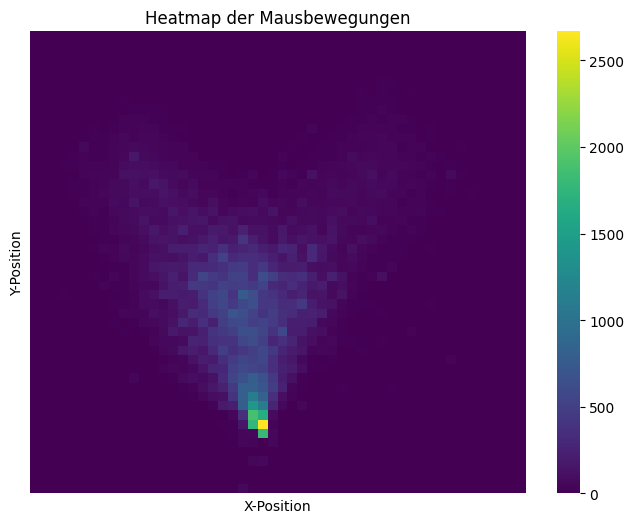

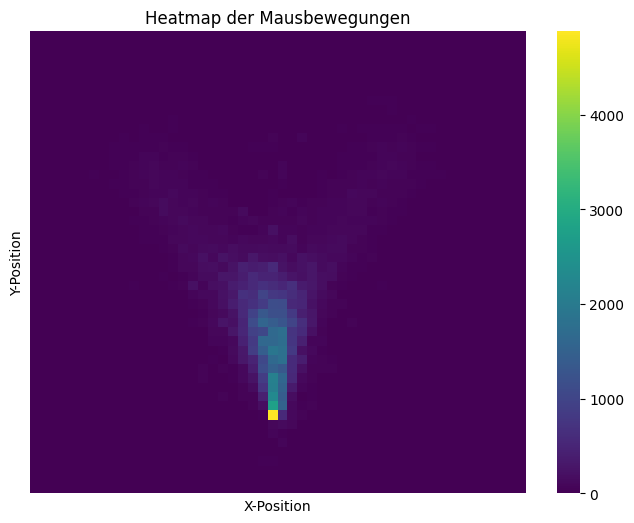

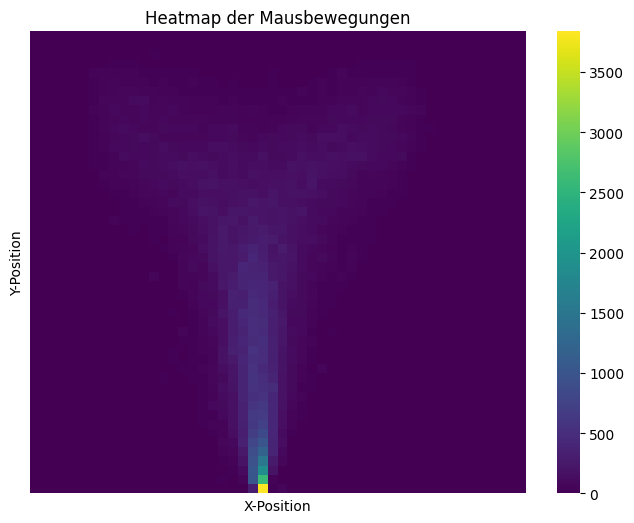

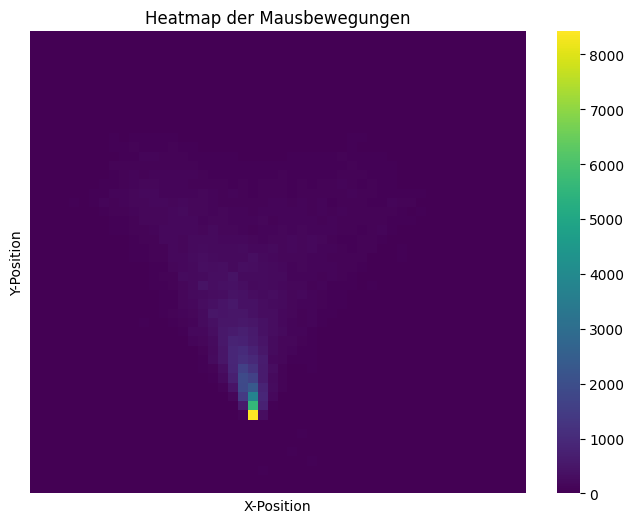

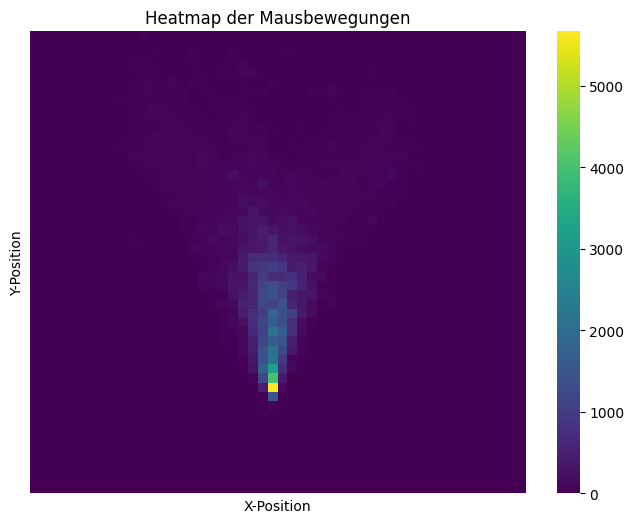

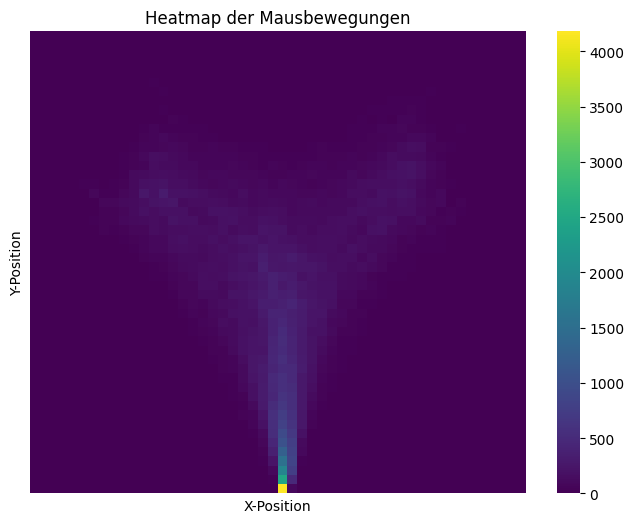

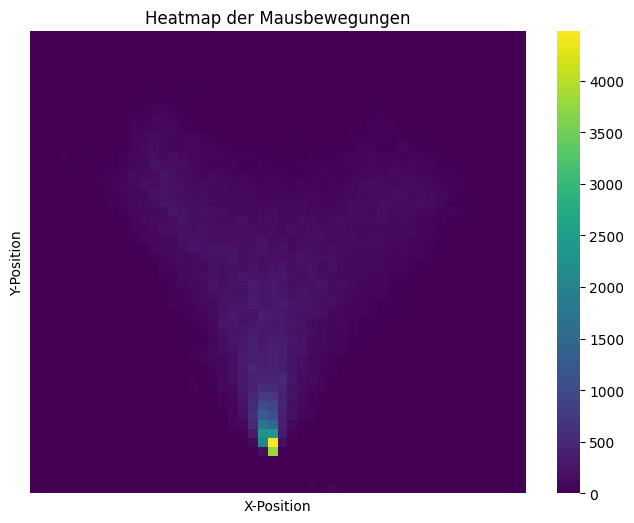

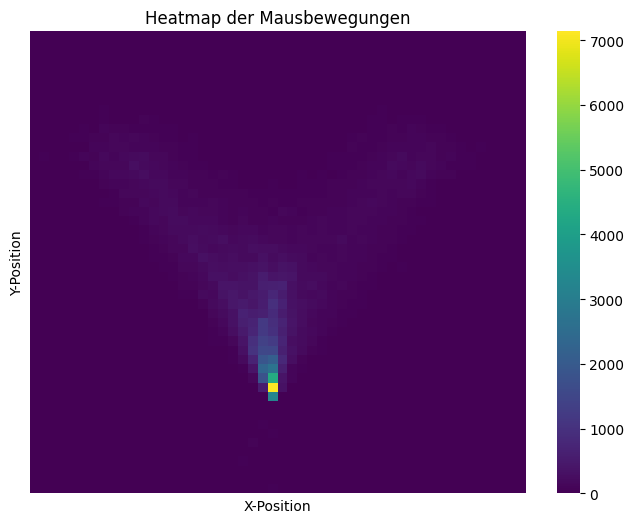

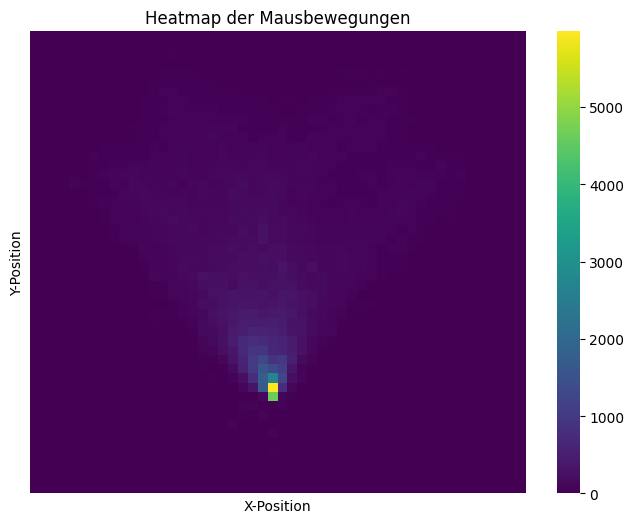

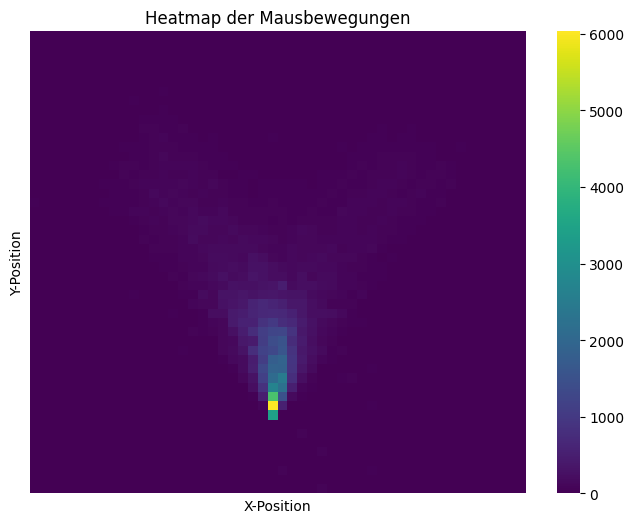

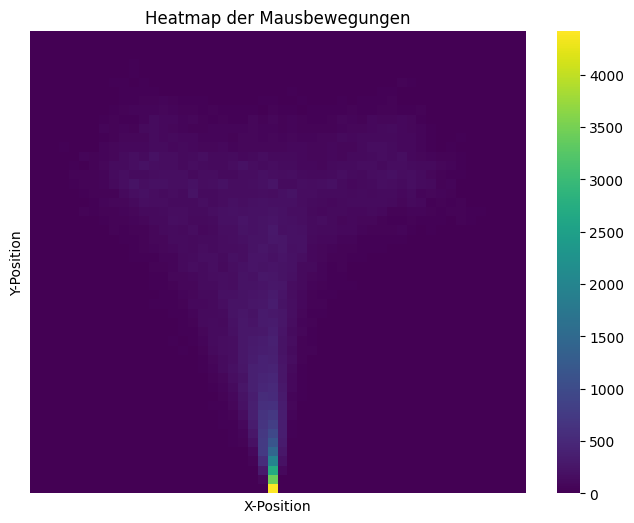

In [4]:
for grouped_mouse_data in grouped_data:
    all_xpos = [x for trial in grouped_mouse_data["xpos"] for x in trial]
    all_ypos = [y for trial in grouped_mouse_data["ypos"] for y in trial]

    # 2D-Histogramm erstellen (Heatmap-Daten)
    heatmap_data, x_edges, y_edges = np.histogram2d(
        all_xpos, all_ypos, bins=50  # 50x50 Raster
    )

    # Heatmap darstellen
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        heatmap_data.T,  # Transponieren, da np.histogram2d die Achsen vertauscht
        cmap="viridis",  # Farbpalette (z. B. 'viridis', 'plasma', 'coolwarm')
        xticklabels=False, yticklabels=False  # Achsenbeschriftung entfernen
    )
    plt.title("Heatmap der Mausbewegungen")
    plt.xlabel("X-Position")
    plt.ylabel("Y-Position")
    plt.show()

In [5]:
condition_0_participants = [1, 6, 2, 4, 9, 11, 13] 


condition_0_data_mouse = []
condition_1_data_mouse = []

for grouped_mouse_data in grouped_data:
    if grouped_mouse_data['participant_num'].iloc[0] in condition_0_participants:
        condition_0_data_mouse.append(grouped_mouse_data)
    else:
        condition_1_data_mouse.append(grouped_mouse_data)
print(len(condition_0_data_mouse)) # sind 8 weil der 6er ja zweimal da is
print(len(condition_1_data_mouse))

6
6


In [6]:
directory = "data"

trial_data_regex = r"trial_data_(\d+)"

all_trial_data = []

for filename in os.listdir(directory):
    trial_data_match = re.search(trial_data_regex, filename)

    if trial_data_match:
        participant_num = int(trial_data_match.group(1))
        file_path = os.path.join(directory, filename)

        df_trial_data = pd.read_csv(file_path, sep=",")

        df_trial_data["participant_num"] = participant_num

        all_trial_data.append(df_trial_data)
        # print(all_trial_data)

In [10]:
condition_0_participants = [1, 6, 2, 4, 9, 11, 13] 

condition_0_data_trial = []
condition_1_data_trial = []

for df in all_trial_data:
    participant_num = df["participant_num"].iloc[0]
    
    if participant_num in condition_0_participants:
        condition_0_data_trial.append(df)
    else:
        condition_1_data_trial.append(df)

print(condition_0_data_trial)
print(len(condition_1_data_trial))

[      trialnumber  blocknumber  success  reactiontime  currentcongruency  \
0               1            1        0             0                  0   
1               2            1        0             0                  1   
2               3            1        0             0                  0   
3               4            1        1           462                  1   
4               5            1        1           454                  0   
...           ...          ...      ...           ...                ...   
1279          316            4        1           615                  0   
1280          317            4        1           256                  1   
1281          318            4        1           467                  1   
1282          319            4        1           283                  1   
1283          320            4        1           423                  1   

      currentdirection  currentlocation  previouscongruency  \
0                    0 

In [ ]:
condition_0_with_latency = []
condition_0_no_latency = []

for trial_list in condition_0_data_trial:
    df = pd.DataFrame(trial_list)
    
    with_latency = df.loc[df["blocknumber"].isin([3, 4])].copy()
    no_latency = df.loc[df["blocknumber"].isin([1, 2])].copy()
    
    condition_0_with_latency.append(with_latency)
    condition_0_no_latency.append(no_latency)


In [15]:
condition_1_with_latency = []
condition_1_no_latency = []

for trial_list in condition_1_data_trial:
    df = pd.DataFrame(trial_list)
    
    with_latency = df.loc[df["blocknumber"].isin([1, 2])].copy()
    no_latency = df.loc[df["blocknumber"].isin([3, 4])].copy()
    
    condition_1_with_latency.append(with_latency)
    condition_1_no_latency.append(no_latency)

In [ ]:
# Wieder zusammengefügt und nach latenz condition gesplittet!
combined_trial_data_with_latency = condition_0_with_latency + condition_1_with_latency
combined_trial_data_no_latency = condition_0_no_latency + condition_1_no_latency

In [22]:
len(combined_trial_data_with_latency[0])

642

In [19]:
condition_0_with_latency_mouse = []
condition_0_no_latency_mouse = []

for mouse_df in condition_0_data_mouse:  
    with_latency = mouse_df.loc[mouse_df["blocknumber"].isin([3, 4])].copy()
    no_latency = mouse_df.loc[mouse_df["blocknumber"].isin([1, 2])].copy()
    
    condition_0_with_latency_mouse.append(with_latency)
    condition_0_no_latency_mouse.append(no_latency)


condition_1_with_latency_mouse = []
condition_1_no_latency_mouse = []

for mouse_df in condition_1_data_mouse:  
    with_latency = mouse_df.loc[mouse_df["blocknumber"].isin([1, 2])].copy()
    no_latency = mouse_df.loc[mouse_df["blocknumber"].isin([3, 4])].copy()
    
    condition_1_with_latency_mouse.append(with_latency)
    condition_1_no_latency_mouse.append(no_latency)

combined_with_latency_mouse = condition_0_with_latency_mouse + condition_1_with_latency_mouse
combined_no_latency_mouse = condition_0_no_latency_mouse + condition_1_no_latency_mouse

In [21]:
print(combined_no_latency_mouse[0])

     blocknumber  trialnumber  \
0              1            4   
1              1            5   
2              1            6   
3              1            7   
4              1            8   
..           ...          ...   
603            2          316   
604            2          317   
605            2          318   
606            2          319   
607            2          320   

                                        timedifference  \
0    [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
1    [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
2    [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
3    [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
4    [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
..                                                 ...   
603  [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
604  [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
605  [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
606  [0, 5, 5, 5, 5, 5,

In [26]:
combined_with_latency_df = pd.concat(combined_trial_data_with_latency, ignore_index=True)
combined_with_latency_mouse_df = pd.concat(combined_with_latency_mouse, ignore_index=True)

combined_with_latency_final = pd.merge(
    combined_with_latency_df,       
    combined_with_latency_mouse_df,
    on=["trialnumber", "blocknumber", "participant_num"],
    how="inner"                      
)

print(combined_with_latency_final.columns)

Index(['trialnumber', 'blocknumber', 'success', 'reactiontime',
       'currentcongruency', 'currentdirection', 'currentlocation',
       'previouscongruency', 'previousdirection', 'previouslocation',
       'participant_num', 'timedifference', 'xpos', 'ypos'],
      dtype='object')


In [28]:
print(combined_with_latency_final.iloc[0])

trialnumber                                                           1
blocknumber                                                           3
success                                                               1
reactiontime                                                        396
currentcongruency                                                     1
currentdirection                                                      1
currentlocation                                                       0
previouscongruency                                                    1
previousdirection                                                     1
previouslocation                                                      0
participant_num                                                       1
timedifference        [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...
xpos                  [0.0, 0.0, 0.0, 0.0, -0.38383838383838426, -1....
ypos                  [0.0, -11.171717171717173, -22.34343434343

In [29]:
combined_no_latency_df = pd.concat(combined_trial_data_no_latency, ignore_index=True)
combined_no_latency_mouse_df = pd.concat(combined_no_latency_mouse, ignore_index=True)

combined_no_latency_final = pd.merge(
    combined_no_latency_df,       
    combined_no_latency_mouse_df,
    on=["trialnumber", "blocknumber", "participant_num"],
    how="inner"                      
)

print(combined_no_latency_final.columns)

Index(['trialnumber', 'blocknumber', 'success', 'reactiontime',
       'currentcongruency', 'currentdirection', 'currentlocation',
       'previouscongruency', 'previousdirection', 'previouslocation',
       'participant_num', 'timedifference', 'xpos', 'ypos'],
      dtype='object')


In [30]:
print(combined_no_latency_final.iloc[0])

trialnumber                                                           4
blocknumber                                                           1
success                                                               1
reactiontime                                                        462
currentcongruency                                                     1
currentdirection                                                      1
currentlocation                                                       0
previouscongruency                                                    0
previousdirection                                                     0
previouslocation                                                      0
participant_num                                                       1
timedifference        [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...
xpos                  [0.0, -1.8585858585858588, -7.151515151515152,...
ypos                  [0.0, -14.86868686868687, -36.606060606060

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
df_trial_data = pd.read_csv("data/trial_data.txt", sep=",")
df_trial_data

,trialnumber,blocknumber,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation
0,1,1,1,1307,0,1,1,0,1,1
1,2,1,1,1747,1,0,0,0,1,1
2,3,1,1,1473,1,1,1,1,0,0
3,4,1,1,1350,0,1,1,1,1,1
4,5,1,1,2279,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
291,291,1,0,0,0,0,1,0,0,0
292,292,1,0,0,1,1,1,0,0,1
293,293,1,0,0,0,1,0,1,1,1
294,294,1,0,0,0,1,0,0,1,0


In [4]:
merged_df = pd.merge(grouped_mouse_data, df_trial_data, on="trialnumber", how="inner")
merged_df

NameError: name 'grouped_mouse_data' is not defined

In [27]:
# Fails entfernen
merged_df["remove"] = merged_df["success"] == 0
merged_df["remove"] = merged_df["remove"] | merged_df["remove"].shift(1, fill_value=0)
filtered_df = merged_df[~merged_df["remove"]].drop(columns=["remove"])
filtered_df

,blocknumber_x,trialnumber,timedifference,xpos,ypos,blocknumber_y,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation
0,1,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.777777777777778, -3.555555555555556, ...","[0.0, -4.444444444444445, -9.666666666666668, ...",1,1,1736,1,1,0,0,1,1
1,2,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 3.0, 3.0, 5.0, 6.0, ...","[0.0, -3.0, -7.0, -10.0, -16.0, -20.0, -27.0, ...",1,1,1736,1,1,0,0,1,1
2,3,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.36363636363636476...","[0.0, -5.7272727272727275, -12.272727272727275...",1,1,1736,1,1,0,0,1,1
3,4,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 3.353535353535354, 6.707070707070708, 10...","[0.0, -6.707070707070708, -15.444444444444446,...",1,1,1736,1,1,0,0,1,1
4,1,8,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.4848484848484863, ...","[0.0, -4.242424242424243, -9.878787878787879, ...",1,1,1190,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,3,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.5353535353535355, -3.070707070707071,...","[0.0, -7.676767676767677, -16.959595959595962,...",1,1,2279,0,0,0,0,1,1
1173,4,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 1.3535353535353536, 2.0, ...","[0.0, -5.515151515151516, -13.545454545454545,...",1,1,2279,0,0,0,0,1,1
1174,2,6,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.3636363636363635, -3.3636363636363638...","[0.0, -5.2727272727272725, -13.545454545454545...",1,1,1345,0,1,1,0,0,0
1175,3,6,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.6666666666666667, -3.333333333333334,...","[0.0, -1.6666666666666667, -3.6666666666666674...",1,1,1345,0,1,1,0,0,0


In [28]:
# Standartabweichung > +-4 entfernen
mean_rt = filtered_df["reactiontime"].mean()
std_rt = filtered_df["reactiontime"].std()

filtered_df["outlier"] = (filtered_df["reactiontime"] < mean_rt - 4 * std_rt) | (filtered_df["reactiontime"] > mean_rt + 4 * std_rt)

filtered_df_new = filtered_df[~filtered_df["outlier"]].drop(columns=["outlier"])
filtered_df_new

,blocknumber_x,trialnumber,timedifference,xpos,ypos,blocknumber_y,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation
0,1,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.777777777777778, -3.555555555555556, ...","[0.0, -4.444444444444445, -9.666666666666668, ...",1,1,1736,1,1,0,0,1,1
1,2,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 3.0, 3.0, 5.0, 6.0, ...","[0.0, -3.0, -7.0, -10.0, -16.0, -20.0, -27.0, ...",1,1,1736,1,1,0,0,1,1
2,3,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.36363636363636476...","[0.0, -5.7272727272727275, -12.272727272727275...",1,1,1736,1,1,0,0,1,1
3,4,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 3.353535353535354, 6.707070707070708, 10...","[0.0, -6.707070707070708, -15.444444444444446,...",1,1,1736,1,1,0,0,1,1
4,1,8,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.4848484848484863, ...","[0.0, -4.242424242424243, -9.878787878787879, ...",1,1,1190,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,3,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.5353535353535355, -3.070707070707071,...","[0.0, -7.676767676767677, -16.959595959595962,...",1,1,2279,0,0,0,0,1,1
1173,4,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 1.3535353535353536, 2.0, ...","[0.0, -5.515151515151516, -13.545454545454545,...",1,1,2279,0,0,0,0,1,1
1174,2,6,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.3636363636363635, -3.3636363636363638...","[0.0, -5.2727272727272725, -13.545454545454545...",1,1,1345,0,1,1,0,0,0
1175,3,6,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.6666666666666667, -3.333333333333334,...","[0.0, -1.6666666666666667, -3.6666666666666674...",1,1,1345,0,1,1,0,0,0


In [29]:
# daten alle auf eine seite spiegeln
def mirror_trajectories(row):
    if row["currentdirection"] == 1:
        row["xpos"] = [-x for x in row["xpos"]]
    return row
mirrored_df =filtered_df_new.apply(mirror_trajectories, axis=1)

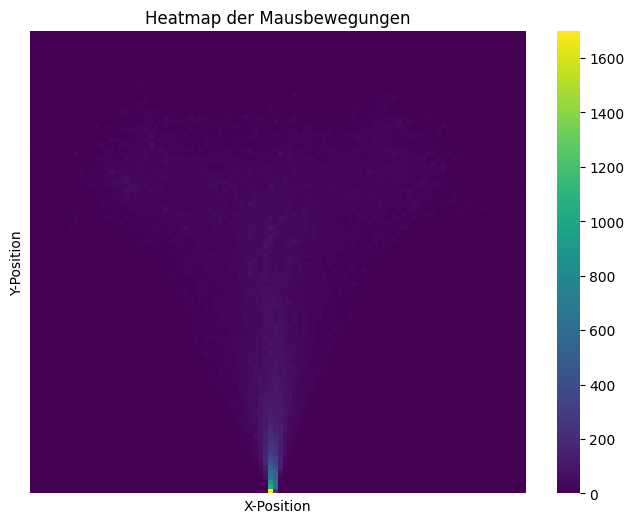

In [30]:
all_xpos = [x for trial in mirrored_df["xpos"] for x in trial]
all_ypos = [y for trial in mirrored_df["ypos"] for y in trial]

# 2D-Histogramm erstellen (Heatmap-Daten)
heatmap_data, x_edges, y_edges = np.histogram2d(
    all_xpos, all_ypos, bins=100  # 50x50 Raster
)

# Heatmap darstellen
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data.T,  # Transponieren, da np.histogram2d die Achsen vertauscht
    cmap="viridis",  # Farbpalette (z. B. 'viridis', 'plasma', 'coolwarm')
    xticklabels=False, yticklabels=False  # Achsenbeschriftung entfernen
)
plt.title("Heatmap der Mausbewegungen")
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
plt.show()

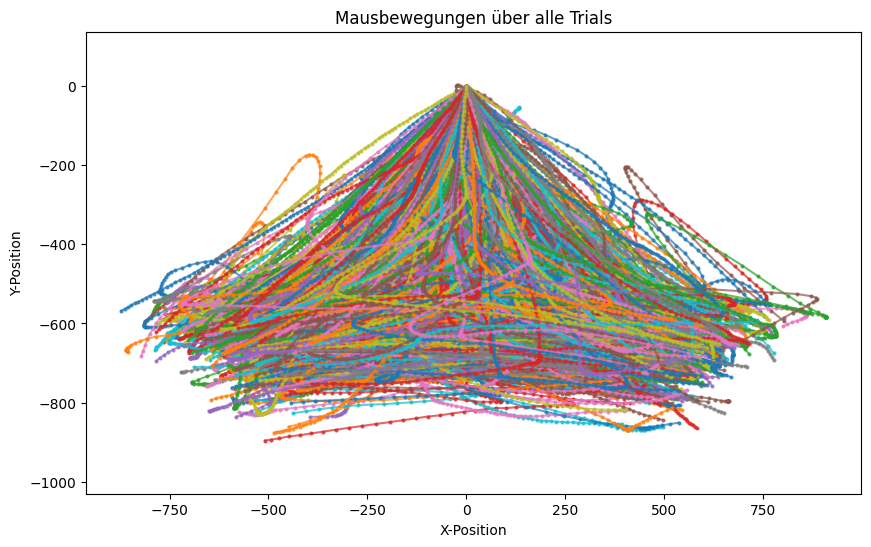

In [31]:
import matplotlib.pyplot as plt

# Plot initialisieren
plt.figure(figsize=(10, 6))

for trial_x, trial_y in zip(mirrored_df["xpos"], mirrored_df["ypos"]):
    plt.plot(trial_x, trial_y, linestyle='-', marker='o', markersize=2, alpha=0.7)

# Achsen und Titel
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
plt.title("Mausbewegungen über alle Trials")
plt.axis('equal')

plt.show()


In [32]:
print(mirrored_df.iloc[0]["ypos"])

[   0.           -4.44444444   -9.66666667  -15.66666667  -23.55555556
  -32.          -40.          -48.66666667  -59.22222222  -69.
  -81.44444444  -92.33333333 -105.66666667 -118.77777778 -131.66666667
 -144.66666667 -157.55555556 -171.77777778 -186.         -202.
 -216.44444444 -230.66666667 -244.88888889 -260.         -275.33333333
 -290.         -305.77777778 -320.         -336.         -352.
 -366.66666667 -382.         -398.         -413.33333333 -427.55555556
 -441.77777778 -456.         -468.44444444 -482.44444444 -494.
 -505.77777778 -516.88888889 -526.33333333 -535.88888889 -547.22222222
 -557.         -563.22222222 -568.66666667 -576.         -581.22222222
 -585.66666667 -590.66666667 -594.88888889 -598.77777778 -605.
 -608.55555556 -612.11111111 -615.         -618.77777778 -622.33333333
 -624.33333333 -625.66666667 -628.33333333 -631.         -632.77777778
 -634.55555556 -635.66666667 -636.55555556 -637.         -637.33333333
 -638.         -638.22222222 -640.         -64

In [33]:
# für curvature
def calculate_curvature_horizontal(xpos, ypos):
    start = np.array([xpos[0], ypos[0]])
    end = np.array([xpos[-1], ypos[-1]])
    
    # geraden
    straight_line_x = np.linspace(start[0], end[0], len(xpos))  # Normierte x werte
    straight_line_y = np.linspace(start[1], end[1], len(ypos))  # Normierte y werte. braucht man hier aber ned
    
    curvature = 0
    for x, x_line in zip(xpos, straight_line_x):
        distance = abs(x - x_line)
        curvature += distance
    
    return curvature

mirrored_df['curvature'] = mirrored_df.apply(lambda row: calculate_curvature_horizontal(row['xpos'], row['ypos']), axis=1)

mirrored_df



,blocknumber_x,trialnumber,timedifference,xpos,ypos,blocknumber_y,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation,curvature
0,1,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, 1.777777777777778, 3.555555555555556, 5...","[0.0, -4.444444444444445, -9.666666666666668, ...",1,1,1736,1,1,0,0,1,1,19714.777778
1,2,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, -0.0, -0.0, -1.0, -1.0, -3.0, -3.0, -5....","[0.0, -3.0, -7.0, -10.0, -16.0, -20.0, -27.0, ...",1,1,1736,1,1,0,0,1,1,7459.131313
2,3,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, -0.0, -0.0, -0.0, -0.0, 0.3636363636363...","[0.0, -5.7272727272727275, -12.272727272727275...",1,1,1736,1,1,0,0,1,1,16047.272727
3,4,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, -3.353535353535354, -6.707070707070708,...","[0.0, -6.707070707070708, -15.444444444444446,...",1,1,1736,1,1,0,0,1,1,18707.202020
4,1,8,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.484848484848...","[0.0, -4.242424242424243, -9.878787878787879, ...",1,1,1190,1,1,1,1,1,0,18200.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,3,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.5353535353535355, -3.070707070707071,...","[0.0, -7.676767676767677, -16.959595959595962,...",1,1,2279,0,0,0,0,1,1,23234.727273
1173,4,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 1.3535353535353536, 2.0, ...","[0.0, -5.515151515151516, -13.545454545454545,...",1,1,2279,0,0,0,0,1,1,27306.747475
1174,2,6,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, 1.3636363636363635, 3.3636363636363638,...","[0.0, -5.2727272727272725, -13.545454545454545...",1,1,1345,0,1,1,0,0,0,19901.606061
1175,3,6,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, 1.6666666666666667, 3.333333333333334, ...","[0.0, -1.6666666666666667, -3.6666666666666674...",1,1,1345,0,1,1,0,0,0,13400.444444


In [34]:
# Berechnung der Trajektorienlänge
def calculate_trajectory_length(xpos, ypos):
    return sum(np.sqrt((xpos[i+1] - xpos[i])**2 + (ypos[i+1] - ypos[i])**2) for i in range(len(xpos)-1))

mirrored_df['trajectory_length'] = mirrored_df.apply(lambda row: calculate_trajectory_length(row['xpos'], row['ypos']), axis=1)
mirrored_df['normalized_curvature'] = mirrored_df['curvature'] / mirrored_df['trajectory_length']

min_curvature = mirrored_df['normalized_curvature'].min()
max_curvature = mirrored_df['normalized_curvature'].max()

mirrored_df['normalized_curvature_minmax'] = (mirrored_df['normalized_curvature'] - min_curvature) / (max_curvature - min_curvature)

mirrored_df


,blocknumber_x,trialnumber,timedifference,xpos,ypos,blocknumber_y,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation,curvature,trajectory_length,normalized_curvature,normalized_curvature_minmax
0,1,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, 1.777777777777778, 3.555555555555556, 5...","[0.0, -4.444444444444445, -9.666666666666668, ...",1,1,1736,1,1,0,0,1,1,19714.777778,1131.272382,17.427083,0.595352
1,2,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, -0.0, -0.0, -1.0, -1.0, -3.0, -3.0, -5....","[0.0, -3.0, -7.0, -10.0, -16.0, -20.0, -27.0, ...",1,1,1736,1,1,0,0,1,1,7459.131313,988.799053,7.543627,0.220964
2,3,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, -0.0, -0.0, -0.0, -0.0, 0.3636363636363...","[0.0, -5.7272727272727275, -12.272727272727275...",1,1,1736,1,1,0,0,1,1,16047.272727,935.365880,17.156145,0.585089
3,4,7,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, -3.353535353535354, -6.707070707070708,...","[0.0, -6.707070707070708, -15.444444444444446,...",1,1,1736,1,1,0,0,1,1,18707.202020,1211.966812,15.435408,0.519907
4,1,8,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.484848484848...","[0.0, -4.242424242424243, -9.878787878787879, ...",1,1,1190,1,1,1,1,1,0,18200.181818,999.283961,18.213223,0.625131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,3,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.5353535353535355, -3.070707070707071,...","[0.0, -7.676767676767677, -16.959595959595962,...",1,1,2279,0,0,0,0,1,1,23234.727273,1127.608615,20.605312,0.715744
1173,4,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 1.3535353535353536, 2.0, ...","[0.0, -5.515151515151516, -13.545454545454545,...",1,1,2279,0,0,0,0,1,1,27306.747475,1442.894643,18.924977,0.652093
1174,2,6,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, 1.3636363636363635, 3.3636363636363638,...","[0.0, -5.2727272727272725, -13.545454545454545...",1,1,1345,0,1,1,0,0,0,19901.606061,1543.457517,12.894172,0.423644
1175,3,6,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-0.0, 1.6666666666666667, 3.333333333333334, ...","[0.0, -1.6666666666666667, -3.6666666666666674...",1,1,1345,0,1,1,0,0,0,13400.444444,934.265369,14.343296,0.478538


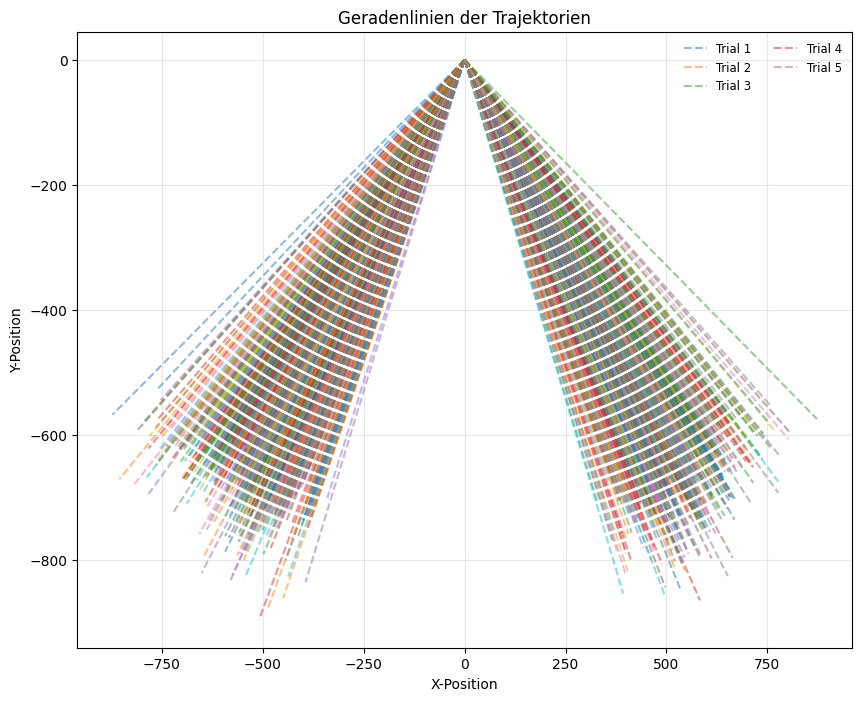

In [35]:
#nur mal um die geraden zu visualisieren
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for index, row in mirrored_df.iterrows():
    xpos = row['xpos']
    ypos = row['ypos']
    
    start = [xpos[0], ypos[0]]
    end = [xpos[-1], ypos[-1]]
    
    straight_line_x = np.linspace(start[0], end[0], len(xpos))
    straight_line_y = np.linspace(start[1], end[1], len(ypos))
    
    plt.plot(straight_line_x, straight_line_y, linestyle='--', alpha=0.5, label=f'Trial {index+1}' if index < 5 else "")

plt.title("Geradenlinien der Trajektorien")
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
plt.legend(loc='upper right', fontsize='small', ncol=2, frameon=False)
plt.grid(alpha=0.3)
plt.show()
